# 프로젝트 : 얼굴을 인식하여 캐릭터 씌우기

## Face Detection vs Face Recognition

### 패키지 설치
> pip install mediapipe

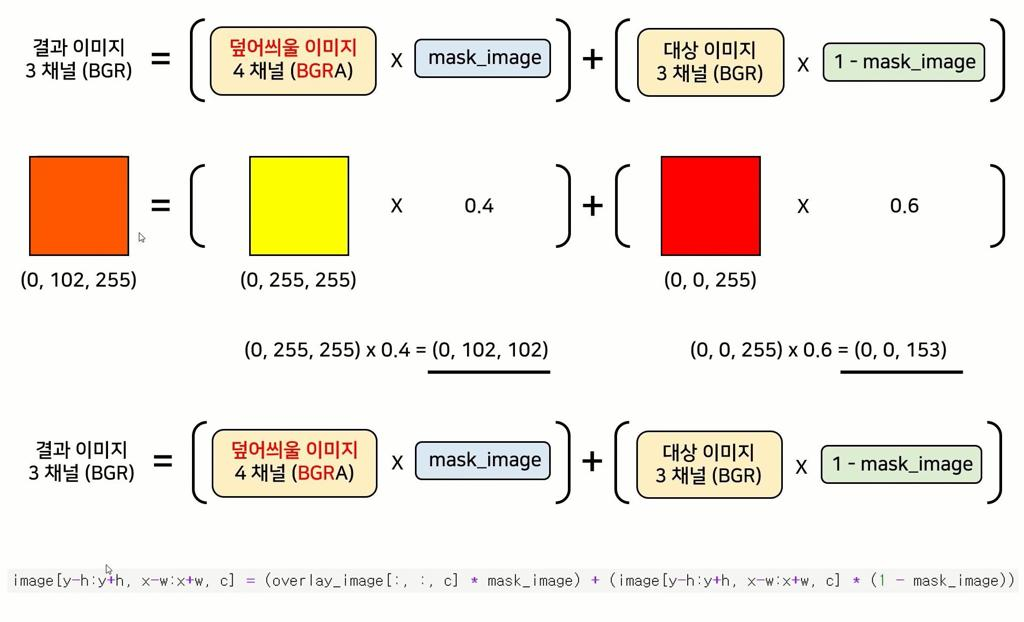

In [1]:
import cv2
import mediapipe as mp


def overlay(image, x, y, w, h, overlay_image): # 대상 이미지 (3채널), x, y 좌표, width, height, 덮어씌울 이미지 (4채널)
    alpha = overlay_image[:, :, 3] # BGRA
    mask_image = alpha / 255 # 0 ~ 255 -> 255 로 나누면 0 ~ 1 사이의 값 (1: 불투명, 0: 완전)
    # (255, 255)  ->  (1, 1)
    # (255, 0)        (1, 0)
    
    # 1 - mask_image ?
    # (0, 0)
    # (0, 1)
    
    for c in range(0, 3): # channel BGR
        image[y-h:y+h, x-w:x+w, c] = (overlay_image[:, :, c] * mask_image) + (image[y-h:y+h, x-w:x+w, c] * (1 - mask_image))
        
# 얼굴착고, 찾은얼굴에 표시해주기위한 변수 정의
mp_face_detection = mp.solutions.face_detection # 얼굴검출 모듈
mp_drawing = mp.solutions.drawing_utils # 얼굴특징 그리는 모듈

# 동영상 파일 열기
cap = cv2.VideoCapture('face_video.mp4')

#이미지 불러오기
image_right_eye=cv2.imread('right_eye.png', cv2.IMREAD_UNCHANGED) #100x100
image_left_eye=cv2.imread('left_eye.png', cv2.IMREAD_UNCHANGED)  #100x100
image_nose=cv2.imread('nose.png', cv2.IMREAD_UNCHANGED)         #300x100 (가로세로)

with mp_face_detection.FaceDetection(model_selection=0, 
                min_detection_confidence=0.7) as face_detection:
    # model_selection 0 :근거리 1: 원거리,  confidence : 정확도
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        # Draw the face detection annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.detections:
            # 6개 특징: 오른눈, 왼눈,코끝,입중심,오른귀, 왼귀
            for detection in results.detections:
                # mp_drawing.draw_detection(image, detection)
                # print(detection)
                
                #특정 위치 가져오기 (이미지크기 1일때의 비율을 실제 좌표로 바꾸기)
                keypoints=detection.location_data.relative_keypoints
                right_eye=keypoints[0] # 오른눈
                left_eye= keypoints[1] # 왼 눈
                nose_tip= keypoints[2] # 코
                
                
                
                h, w, _ = image.shape  # height,width,channel 이미지크기 세로가로
                right_eye = (int(right_eye.x*w)-20, int(right_eye.y*h)-100)
                left_eye = (int(left_eye.x*w)+20, int(left_eye.y*h)-100)
                nose_tip= (int(nose_tip.x*w), int(nose_tip.y*h))
                
                # 양눈에 동그라미 그리기
                # cv2.circle(image, right_eye, 50, (255, 0, 0),10, cv2.LINE_AA)
                # cv2.circle(image, left_eye, 50, (0, 255, 0),10, cv2.LINE_AA)
                # 코에 동그라미 그리기
                # cv2.circle(image, nose_tip, 75, (0, 255, 225),10, cv2.LINE_AA)
                
                # 각특징에 이미지 그리기
                # image[right_eye[1]-50:right_eye[1]+50, right_eye[0]-50:right_eye[0]+50]=image_right_eye
                # image[left_eye[1]-50:left_eye[1]+50, left_eye[0]-50:left_eye[0]+50]=image_left_eye
                # image[nose_tip[1]-50:nose_tip[1]+50, nose_tip[0]-150:nose_tip[0]+150]=image_nose
                
                # image,x,y,w,h,overlay_image
                overlay(image,*right_eye, 50, 50, image_right_eye)
                overlay(image,*left_eye, 50, 50, image_left_eye)
                overlay(image,*nose_tip, 150, 50, image_nose)
                
                
                
                
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Face Detection', cv2.resize(image, None, fx=0.5, fy=0.5))
        if cv2.waitKey(1) ==  ord('q'):
            break
cap.release()
cv2.destroyAllWindows()